In [161]:
import pandas as pd

In [162]:
data = pd.read_csv('SpaceX-Missions.csv')

In [163]:
data.head(5)

,Flight Number,Launch Date,Launch Time,Launch Site,Vehicle Type,Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Customer Name,Customer Type,Customer Country,Mission Outcome,Failure Reason,Landing Type,Landing Outcome
0,F1-1,24 March 2006,22:30,Marshall Islands,Falcon 1,FalconSAT-2,Research Satellite,19.5,NaN,DARPA,Government,United States,Failure,Engine Fire During Launch,NaN,NaN
1,F1-2,21 March 2007,01:10,Marshall Islands,Falcon 1,DemoSat,NaN,NaN,NaN,DARPA,Government,United States,Failure,Engine Shutdown During Launch,NaN,NaN
2,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Trailblazer,Communication Satellite,NaN,NaN,ORS,Government,United States,Failure,Collision During Launch,NaN,NaN
3,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,"PRESat, NanoSail-D",Research Satellites,8.0,NaN,NASA,Government,United States,Failure,Collision During Launch,NaN,NaN
4,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Explorers,Human Remains,NaN,NaN,Celestis,Business,United States,Failure,Collision During Launch,NaN,NaN


In [164]:
print(data.columns)

Index(['Flight Number', 'Launch Date', 'Launch Time', 'Launch Site',
       'Vehicle Type', 'Payload Name', 'Payload Type', 'Payload Mass (kg)',
       'Payload Orbit', 'Customer Name', 'Customer Type', 'Customer Country',
       'Mission Outcome', 'Failure Reason', 'Landing Type', 'Landing Outcome'],
      dtype='object')


In [165]:
data_cleaned = data.dropna(subset=['Payload Mass (kg)'])

In [166]:
data_cleaned.head(5)

,Flight Number,Launch Date,Launch Time,Launch Site,Vehicle Type,Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Customer Name,Customer Type,Customer Country,Mission Outcome,Failure Reason,Landing Type,Landing Outcome
0,F1-1,24 March 2006,22:30,Marshall Islands,Falcon 1,FalconSAT-2,Research Satellite,19.5,NaN,DARPA,Government,United States,Failure,Engine Fire During Launch,NaN,NaN
3,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,"PRESat, NanoSail-D",Research Satellites,8.0,NaN,NASA,Government,United States,Failure,Collision During Launch,NaN,NaN
5,F1-4,28 September 2008,23:15,Marshall Islands,Falcon 1,RatSat (DemoSat),NaN,165.0,Low Earth Orbit,NaN,NaN,NaN,Success,NaN,NaN,NaN
6,F1-5,14 July 2009,03:35,Marshall Islands,Falcon 1,RazakSAT,Weather Satellite,180.0,Low Earth Orbit,ATSB,Government,Malaysia,Success,NaN,NaN,NaN
10,F9-4,8 October 2012,00:35,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),SpaceX CRS-1,Space Station Supplies,500.0,Low Earth Orbit,NASA,Government,United States,Success,NaN,NaN,NaN


In [167]:
cleaned_data = data_cleaned.copy()
cleaned_data.to_csv('cleaned_spacex_data.csv', index=False)
cleaned_data = pd.read_csv('cleaned_spacex_data.csv')

In [168]:
#Success Rate per Year (the ratio of successful missions to total missions within a specific year)

In [169]:
cleaned_data['Launch Year'] = pd.to_datetime(cleaned_data['Launch Date']).dt.year

successful_launches = cleaned_data[cleaned_data['Mission Outcome'] == 'Success']
total_launches_per_year = cleaned_data.groupby('Launch Year').size()
successful_launches_per_year = successful_launches.groupby('Launch Year').size()
success_rate_per_year = (successful_launches_per_year / total_launches_per_year) * 100
print(success_rate_per_year)

Launch Year
2006           NaN
2008     50.000000
2009    100.000000
2012     50.000000
2013    100.000000
2014    100.000000
2015     85.714286
2016     90.000000
2017    100.000000
dtype: float64


In [170]:
cleaned_data['Success Flag'] = cleaned_data['Mission Outcome'].apply(lambda x: 1 if x == 'Success' else 0)

In [171]:
correlation_1 = cleaned_data[['Launch Year', 'Success Flag']].corr()
print(correlation_1)

              Launch Year  Success Flag
Launch Year      1.000000      0.414784
Success Flag     0.414784      1.000000


In [172]:
from scipy import stats
correlation_coefficient, p_value = stats.pearsonr(cleaned_data['Launch Year'], cleaned_data['Success Flag'])
print(p_value)
#there is a statistically significant correlation between Launch Year and Success Flag

0.016389591496887637


In [173]:
import matplotlib.pyplot as plt

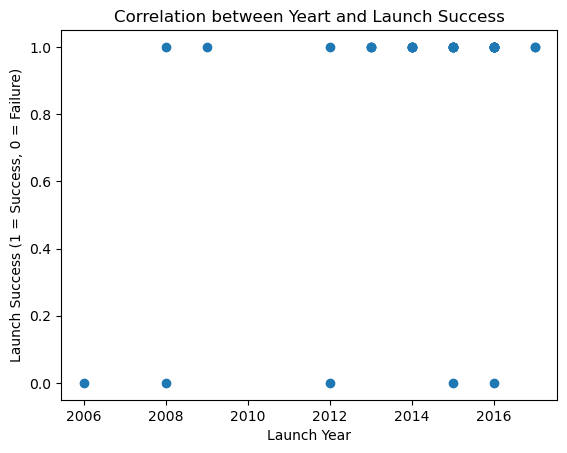

In [174]:
plt.scatter(cleaned_data['Launch Year'], cleaned_data['Success Flag'])
plt.title('Correlation between Yeart and Launch Success')
plt.xlabel('Launch Year')
plt.ylabel('Launch Success (1 = Success, 0 = Failure)')
plt.show()

In [175]:
#Predict the likelihood of future mission success (with logistic regression)

In [176]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [177]:
import statsmodels.api as sm
X = sm.add_constant(cleaned_data['Launch Year'])
y = cleaned_data['Success Flag']

model = sm.GLM(y, X, family=sm.families.Binomial())
result = model.fit()

print(result.summary())
#There is a statistically significant positive relationship between Launch Year and the Success Flag. However, other important variables may not be included in the analysis that could help explain the success of the missions more fully.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                 Generalized Linear Model Regression Results                  
Dep. Variable:           Success Flag   No. Observations:                   33
Model:                            GLM   Df Residuals:                       31
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11.710
Date:                Sat, 02 Nov 2024   Deviance:                       23.419
Time:                        17:43:41   Pearson chi2:                     34.8
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1315
Covariance Type:            nonrobust  

In [178]:
#Payload Weight Category
#Light Payload: 0-1000 kg
#Medium Payload: 1001-5000 kg
#Heavy Payload: 5001-10,000 kg
#Super Heavy Payload: Over 10,000 kg

In [179]:
def categorize_payload(weight):
    if weight < 1000:
        return 'Light'
    elif 1000 <= weight < 5000:
        return 'Medium'
    elif 5000 <= weight < 10000:
        return 'Heavy'
    else:
        return 'Very Heavy'
cleaned_data['Payload Category'] = cleaned_data['Payload Mass (kg)'].apply(categorize_payload)

In [180]:
print(cleaned_data)

   Flight Number        Launch Date Launch Time                  Launch Site  \
0           F1-1      24 March 2006       22:30             Marshall Islands   
1           F1-3      3 August 2008       03:34             Marshall Islands   
2           F1-4  28 September 2008       23:15             Marshall Islands   
3           F1-5       14 July 2009       03:35             Marshall Islands   
4           F9-4     8 October 2012       00:35     Cape Canaveral AFS LC-40   
5           F9-4     8 October 2012       00:35     Cape Canaveral AFS LC-40   
6           F9-5       1 March 2013       15:10     Cape Canaveral AFS LC-40   
7           F9-6  29 September 2013       16:00        Vandenberg AFB SLC-4E   
8           F9-7    3 December 2013       22:41     Cape Canaveral AFS LC-40   
9           F9-8    6 December 2014       22:06     Cape Canaveral AFS LC-40   
10          F9-9      18 April 2014       19:25     Cape Canaveral AFS LC-40   
11         F9-11      5 August 2014     

In [181]:
#Correlation between payload weight and launch success rates with Pearson correlation coefficient

In [182]:
cleaned_data['Success Flag'] = cleaned_data['Mission Outcome'].apply(lambda x: 1 if x == 'Success' else 0)

In [183]:
correlation = cleaned_data[['Payload Mass (kg)', 'Success Flag']].corr()
print(correlation)

                   Payload Mass (kg)  Success Flag
Payload Mass (kg)           1.000000      0.244385
Success Flag                0.244385      1.000000


In [239]:
correlation_coefficient, p_value = stats.pearsonr(cleaned_data['Payload Mass (kg)'], cleaned_data['Success Flag'])
print(p_value)

0.17048623921423323


In [184]:
#Correlation is weak.This means that payload mass is not a major determining factor for success.

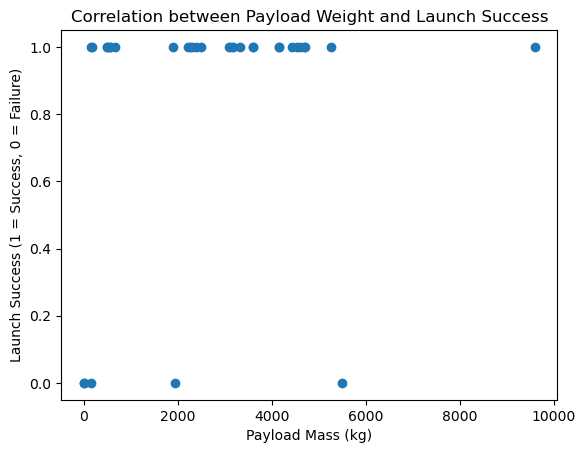

In [185]:
import matplotlib.pyplot as plt
plt.scatter(cleaned_data['Payload Mass (kg)'], cleaned_data['Success Flag'])
plt.title('Correlation between Payload Weight and Launch Success')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Success (1 = Success, 0 = Failure)')
plt.show()

In [186]:
#Chi-Square Test to check correlation between different payload weight categories and success rate

In [187]:
contingency_table = pd.crosstab(cleaned_data['Payload Category'], cleaned_data['Success Flag'])
print(contingency_table)

Success Flag      0   1
Payload Category       
Heavy             1   2
Light             3   7
Medium            1  19


In [188]:
!pip install scipy

In [189]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(chi2)
print(p)

4.089642857142858
0.12940329564566885


In [190]:
#No statistically significant association between the payload weight categories and the success rates of SpaceX launches

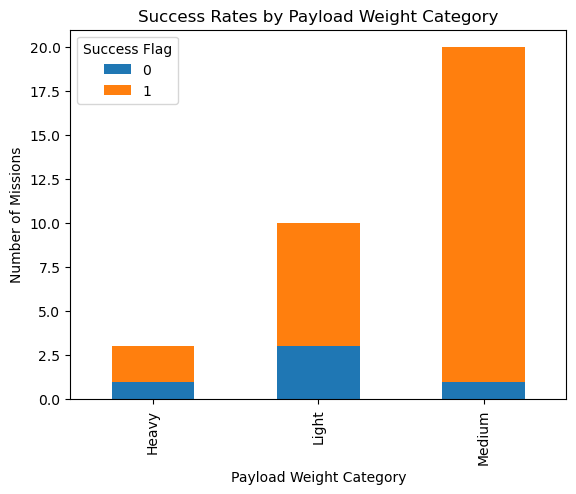

In [191]:
contingency_table.plot(kind='bar', stacked=True)
plt.title('Success Rates by Payload Weight Category')
plt.xlabel('Payload Weight Category')
plt.ylabel('Number of Missions')
plt.show()

In [192]:
#Correlation between success rate and orbit

In [193]:
def categorize_orbit(orbit):
    if orbit == 'Low Earth Orbit':
        return '1'
    elif orbit == 'Polar Orbit':
        return '2'
    elif orbit == 'Geostationary Transfer Orbit':
        return '3'
    else:
        return '4'
cleaned_data['Orbit Category'] = cleaned_data['Payload Orbit'].apply(categorize_orbit)

In [194]:
print(cleaned_data)

   Flight Number        Launch Date Launch Time                  Launch Site  \
0           F1-1      24 March 2006       22:30             Marshall Islands   
1           F1-3      3 August 2008       03:34             Marshall Islands   
2           F1-4  28 September 2008       23:15             Marshall Islands   
3           F1-5       14 July 2009       03:35             Marshall Islands   
4           F9-4     8 October 2012       00:35     Cape Canaveral AFS LC-40   
5           F9-4     8 October 2012       00:35     Cape Canaveral AFS LC-40   
6           F9-5       1 March 2013       15:10     Cape Canaveral AFS LC-40   
7           F9-6  29 September 2013       16:00        Vandenberg AFB SLC-4E   
8           F9-7    3 December 2013       22:41     Cape Canaveral AFS LC-40   
9           F9-8    6 December 2014       22:06     Cape Canaveral AFS LC-40   
10          F9-9      18 April 2014       19:25     Cape Canaveral AFS LC-40   
11         F9-11      5 August 2014     

In [195]:
contingency_table = pd.crosstab(cleaned_data['Orbit Category'], cleaned_data['Success Flag'])
print(contingency_table)

Success Flag    0   1
Orbit Category       
1               2  12
2               0   1
3               1  14
4               2   1


In [196]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(p)
#there is not enough evidence to conclude that there is a significant association between the orbit category and the success rate of SpaceX missions

0.0652184147564805


In [197]:
#Correlation between the type of mission (e.g., government, commercial, scientific) and success rates

In [198]:
contingency_table = pd.crosstab(cleaned_data['Customer Type'], cleaned_data['Success Flag'])
print(contingency_table)

Success Flag   0   1
Customer Type       
Business       2  14
Government     3  13


In [199]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(p)
#No correlation

1.0


In [200]:
#Correlation between the type of payload and success rates

In [201]:
contingency_table = pd.crosstab(cleaned_data['Payload Type'], cleaned_data['Success Flag'])
print(contingency_table)

Success Flag                      0   1
Payload Type                           
Communication Satellite           2  14
Communication/Research Satellite  0   1
Research Satellite                1   0
Research Satellites               1   0
Space Station Supplies            1   9
Weather Satellite                 0   3


In [202]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(p)
print(chi2)
#there is a statistically significant relationship between the type of payload and the success rate

0.03619454156199013
11.89925925925926


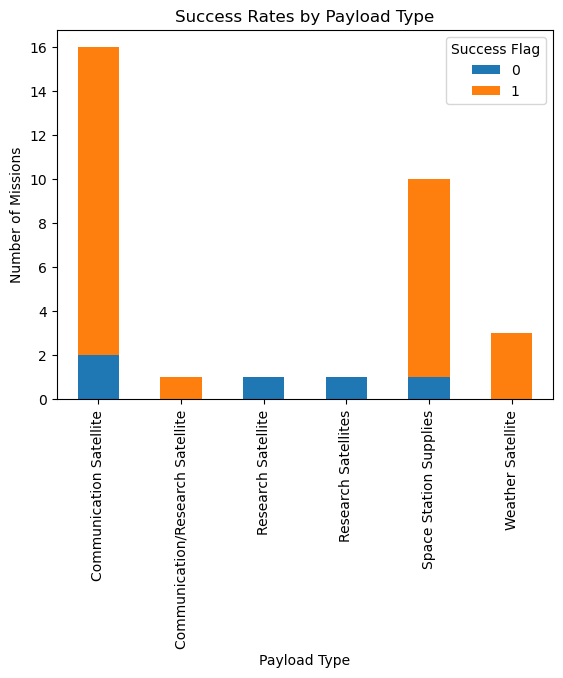

In [203]:
contingency_table.plot(kind='bar', stacked=True)
plt.title('Success Rates by Payload Type')
plt.xlabel('Payload Type')
plt.ylabel('Number of Missions')
plt.show()

In [204]:
#Correlation between payload type, customer type and success rate 

In [205]:
contingency_table = pd.crosstab(index=[cleaned_data['Payload Type'], cleaned_data['Customer Type']],
                                  columns=cleaned_data['Success Flag'])
print(contingency_table)

Success Flag                                    0   1
Payload Type                     Customer Type       
Communication Satellite          Business       2  13
                                 Government     0   1
Communication/Research Satellite Business       0   1
Research Satellite               Government     1   0
Research Satellites              Government     1   0
Space Station Supplies           Government     1   9
Weather Satellite                Government     0   3


In [206]:
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
print(p)
#There is correlation

0.03619454156199013


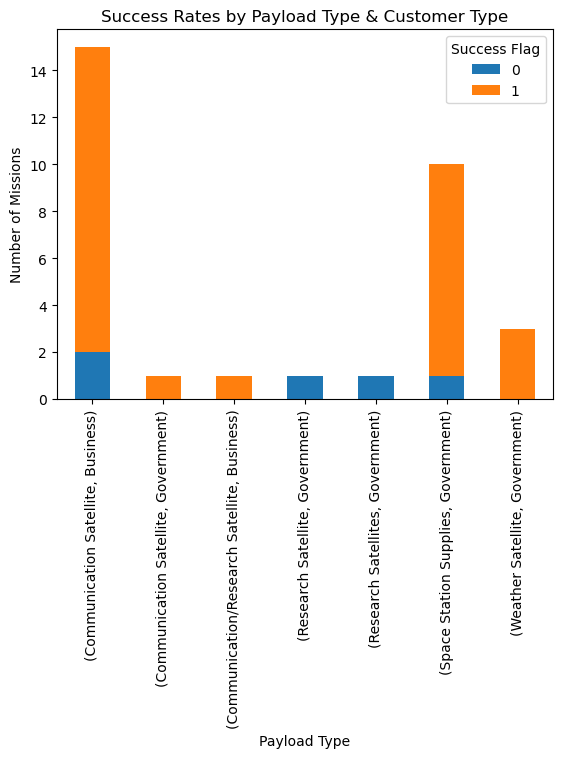

In [207]:
contingency_table.plot(kind='bar', stacked=True)
plt.title('Success Rates by Payload Type & Customer Type')
plt.xlabel('Payload Type')
plt.ylabel('Number of Missions')
plt.show()

In [208]:
#Correlation between payload type, orbit and success rate 

In [209]:
contingency_table = pd.crosstab(index=[cleaned_data['Payload Type'], cleaned_data['Payload Orbit']],
                                  columns=cleaned_data['Success Flag'])
print(contingency_table)

Success Flag                                                   0   1
Payload Type                     Payload Orbit                      
Communication Satellite          Geostationary Transfer Orbit  1  13
                                 Low Earth Orbit               1   1
Communication/Research Satellite Polar Orbit                   0   1
Space Station Supplies           Geostationary Transfer Orbit  0   1
                                 Low Earth Orbit               1   8
Weather Satellite                Low Earth Orbit               0   2
                                 Sun/Earth Orbit               0   1


In [210]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(p)
print(chi2)
#No Correlation

0.6428258266368201
4.250440917107584


In [211]:
#Correlation between customer type, orbit and success rate 

In [212]:
contingency_table = pd.crosstab(index=[cleaned_data['Customer Type'], cleaned_data['Payload Orbit']],
                                  columns=cleaned_data['Success Flag'])
print(contingency_table)

Success Flag                                0   1
Customer Type Payload Orbit                      
Business      Geostationary Transfer Orbit  1  12
              Low Earth Orbit               1   1
              Polar Orbit                   0   1
Government    Geostationary Transfer Orbit  0   2
              Low Earth Orbit               1  10
              Sun/Earth Orbit               0   1


In [213]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(p)
print(chi2)
#No correlation

0.53695593469795
4.087024087024088


In [214]:
#Correlation between payload category, orbit and success rate 

In [215]:
contingency_table = pd.crosstab(index=[cleaned_data['Payload Category'], cleaned_data['Payload Orbit']],
                                  columns=cleaned_data['Success Flag'])
print(contingency_table)

Success Flag                                   0   1
Payload Category Payload Orbit                      
Heavy            Geostationary Transfer Orbit  1   1
                 Low Earth Orbit               0   1
Light            Low Earth Orbit               1   5
                 Polar Orbit                   0   1
                 Sun/Earth Orbit               0   1
Medium           Geostationary Transfer Orbit  0  13
                 Low Earth Orbit               1   6


In [216]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(p)
#No correlation

0.4299550888562007


In [217]:
#Correlation between payload category, customer type and success rate 

In [218]:
contingency_table = pd.crosstab(index=[cleaned_data['Payload Category'], cleaned_data['Customer Type']],
                                  columns=cleaned_data['Success Flag'])
print(contingency_table)

Success Flag                    0   1
Payload Category Customer Type       
Heavy            Business       1   2
Light            Business       1   1
                 Government     2   5
Medium           Business       0  11
                 Government     1   8


In [219]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(p)
#No correlation

0.23345112787860278


In [220]:
#Correlation between payload category, payload type and success rate 

In [221]:
contingency_table = pd.crosstab(index=[cleaned_data['Payload Category'], cleaned_data['Payload Type']],
                                  columns=cleaned_data['Success Flag'])
print(contingency_table)

Success Flag                                       0   1
Payload Category Payload Type                           
Heavy            Communication Satellite           1   2
Light            Communication Satellite           1   0
                 Communication/Research Satellite  0   1
                 Research Satellite                1   0
                 Research Satellites               1   0
                 Space Station Supplies            0   2
                 Weather Satellite                 0   3
Medium           Communication Satellite           0  12
                 Space Station Supplies            1   7


In [222]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(p)
#There is correlation

0.009237728848308162


In [223]:
#Decision tree to check correlation between payload category, payload type and success rate 

In [224]:
pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [225]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [226]:
cleaned_data['Payload Category'] = cleaned_data['Payload Category'].astype('category').cat.codes
cleaned_data['Payload Type'] = cleaned_data['Payload Type'].astype('category').cat.codes

In [227]:
X = cleaned_data[['Payload Category', 'Payload Type']]
y = cleaned_data['Success Flag']

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [229]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [230]:
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.86


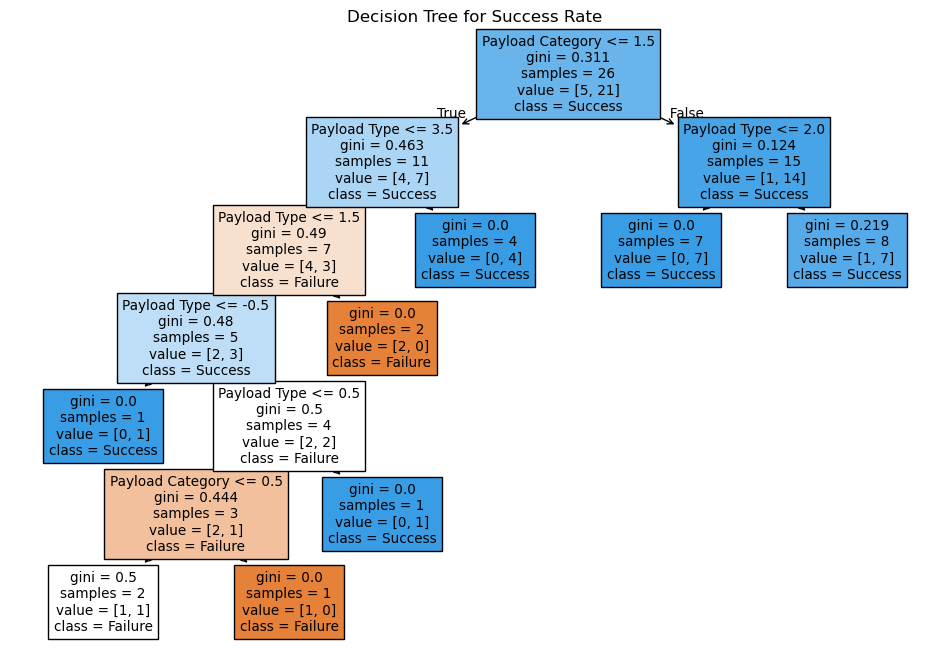

In [231]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=['Payload Category', 'Payload Type'], class_names=['Failure', 'Success'], filled=True)
plt.title('Decision Tree for Success Rate')
plt.show()

In [232]:
from sklearn.preprocessing import LabelEncoder

In [233]:
le = LabelEncoder()

In [234]:
data['Payload Type Encoded'] = le.fit_transform(data['Payload Type'])

In [235]:
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'Communication Satellite': 0, 'Communication/Research Satellite': 1, 'Human Remains': 2, 'Research Satellite': 3, 'Research Satellites': 4, 'Space Station Supplies': 5, 'Weather Satellite': 6, nan: 7}


In [237]:
cleaned_data['Payload Category Encoded'] = le.fit_transform(cleaned_data['Payload Category'])

In [238]:
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)
#'Light Payload': 0,
#'Medium Payload': 1,
#'Heavy Payload': 2,

{0: 0, 1: 1, 2: 2}
